In [1]:
%matplotlib inline 

import glob
import os
import json

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [2]:
import seaborn as sns
sns.set(style="darkgrid")

In [3]:
DATA_DIR = os.path.join('../data')
SAMPLE_RUN = os.path.join(DATA_DIR, 'sample-data', 'driving_log.csv')
TEST_RUN = os.path.join(DATA_DIR, 'new-data', 'run1', 'driving_log.csv')

In [4]:
sample_run = pd.read_csv(SAMPLE_RUN)
test_run = pd.read_csv(TEST_RUN, header=0)

In [5]:
test_run.columns = sample_run.columns

In [6]:
sample_run.columns

Index(['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed'], dtype='object')

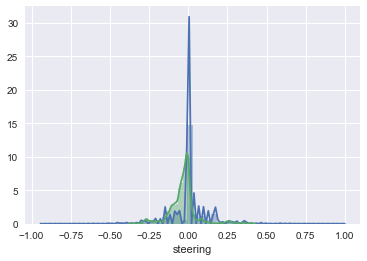

In [7]:
ax = sns.distplot(sample_run['steering'])
sns.distplot(test_run['steering'])

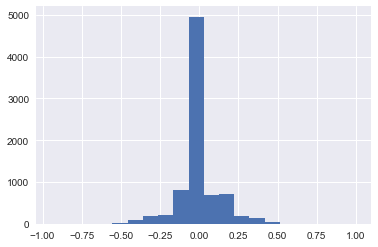

In [8]:
sample_run['steering'].hist(bins=20)

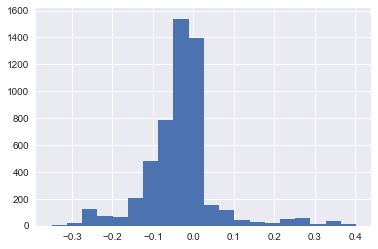

In [9]:
test_run['steering'].hist(bins=20)

In [10]:
test_run.shape

(5238, 7)

In [11]:
sample_run.shape

(8036, 7)

In [12]:
steering_hist = np.histogram(test_run['steering'], bins=20)

In [13]:
steering_hist

(array([   9,   21,  125,   75,   65,  207,  484,  789, 1539, 1393,  157,
         117,   46,   26,   18,   50,   55,   15,   32,   15]),
 array([-0.35      , -0.31242519, -0.27485038, -0.23727557, -0.19970076,
        -0.16212595, -0.12455114, -0.08697633, -0.04940152, -0.01182671,
         0.0257481 ,  0.06332291,  0.10089772,  0.13847253,  0.17604734,
         0.21362215,  0.25119696,  0.28877177,  0.32634658,  0.36392139,
         0.4014962 ]))

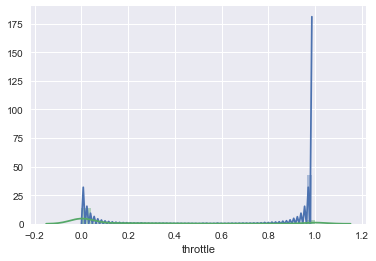

In [14]:
ax = sns.distplot(sample_run['throttle'])
sns.distplot(test_run['throttle'])

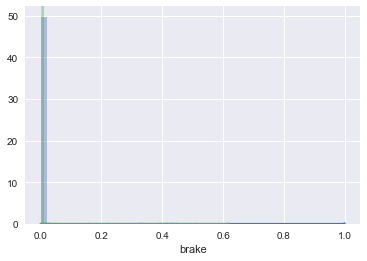

In [15]:
ax = sns.distplot(sample_run['brake'])
sns.distplot(test_run['brake'])

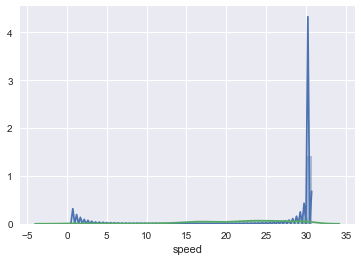

In [16]:
ax = sns.distplot(sample_run['speed'])
sns.distplot(test_run['speed'])

In [32]:
steering_hist = np.histogram(sample_run['steering'], bins=20)

In [33]:
steering_hist

(array([   4,    2,    3,    4,   21,   80,  180,  214,  811, 4956,  693,
         712,  176,  128,   38,    6,    5,    1,    0,    2]),
 array([-0.9426954 , -0.84556063, -0.74842586, -0.65129109, -0.55415632,
        -0.45702155, -0.35988678, -0.26275201, -0.16561724, -0.06848247,
         0.0286523 ,  0.12578707,  0.22292184,  0.32005661,  0.41719138,
         0.51432615,  0.61146092,  0.70859569,  0.80573046,  0.90286523,  1.        ]))

In [35]:
angles = np.hstack((sample_run['steering'], -sample_run['steering']))

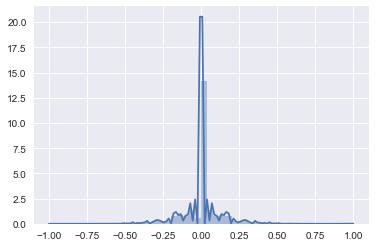

In [36]:
ax = sns.distplot(angles)

In [39]:
steering_hist = np.histogram(angles, bins=20)
steering_hist

(array([    6,     1,     3,    11,    23,   104,   250,   461,  1254,
         1562, 10284,  1254,   461,   250,   104,    23,    11,     3,
            1,     6]),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]))

In [41]:
p = 1 - steering_hist[0]/(len(angles)*1.0)
p

array([ 0.99962668,  0.99993778,  0.99981334,  0.99931558,  0.99856894,
        0.99352912,  0.984445  ,  0.97131658,  0.92197611,  0.90281234,
        0.36012942,  0.92197611,  0.97131658,  0.984445  ,  0.99352912,
        0.99856894,  0.99931558,  0.99981334,  0.99993778,  0.99962668])

In [45]:
128//20

6

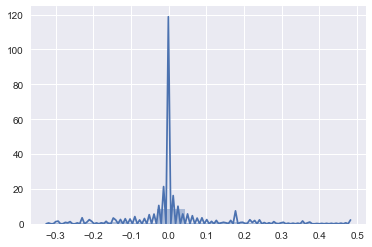

In [48]:
rsmpl = np.random.choice(angles, 128)
sns.distplot(rsmpl)

In [50]:
count, bins = np.histogram(angles, bins=20)

In [51]:
keep_prob = []
for angle in angles:
    for i in range(len(count)):
        if bins[i] < angle <= bins[i+1]:
            keep_prob.append(p[i])

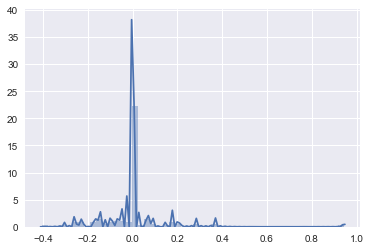

In [57]:
rsmpl = np.random.choice(angles, 128, keep_prob)
sns.distplot(rsmpl)

(array([  2.,   4.,   4.,   4.,  85.,  13.,   6.,   6.,   3.,   1.]),
 array([-0.4540697 , -0.35616466, -0.25825962, -0.16035458, -0.06244954,
         0.0354555 ,  0.13336054,  0.23126558,  0.32917062,  0.42707566,
         0.5249807 ]),
 <a list of 10 Patch objects>)

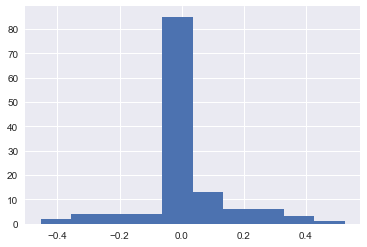

In [61]:
rsmpl = np.random.choice(angles, 128, keep_prob)
plt.hist(rsmpl)

(array([  1.,   7.,   9.,   9.,  73.,  11.,   9.,   2.,   1.,   6.]),
 array([-0.3583844 , -0.28144112, -0.20449784, -0.12755456, -0.05061128,
         0.026332  ,  0.10327528,  0.18021856,  0.25716184,  0.33410512,
         0.4110484 ]),
 <a list of 10 Patch objects>)

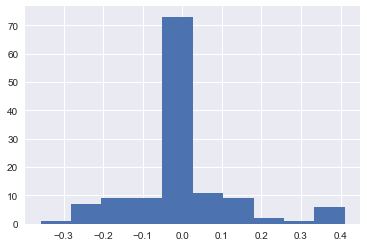

In [60]:
plt.hist(np.random.choice(angles, 128))

In [62]:
buckets = dict()
for angle in angles:
    for i in range(len(count)):
        if bins[i] < angle <= bins[i+1]:
            examples = buckets.get(bins[i], list())
            examples.append(angle)
            buckets[bins[i]] = examples

In [63]:
buckets.keys()

dict_keys([-0.099999999999999978, 0.0, -0.90000000000000002, 0.60000000000000009, 0.90000000000000013, 0.10000000000000009, -0.80000000000000004, -1.0, 0.70000000000000018, -0.69999999999999996, -0.39999999999999991, -0.59999999999999998, 0.30000000000000004, 0.40000000000000013, 0.20000000000000018, 0.80000000000000004, 0.5, -0.19999999999999996, -0.29999999999999993, -0.5])

In [65]:
128/len(buckets)

6.4

(array([ 14.,  14.,  10.,  10.,  13.,  12.,  13.,  11.,  11.,  12.]),
 array([-0.9426954 , -0.74842586, -0.55415632, -0.35988678, -0.16561724,
         0.0286523 ,  0.22292184,  0.41719138,  0.61146092,  0.80573046,  1.        ]),
 <a list of 10 Patch objects>)

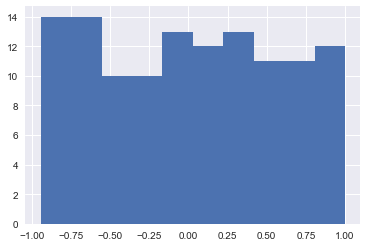

In [66]:
rsmpl = []
for k,v in buckets.items():
    rsmpl.extend(np.random.choice(v, 6))
    
plt.hist(rsmpl)

In [75]:
np.random.choice(2, 2)

array([0, 1])